In [12]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import graphviz 
from collections import Counter
from sklearn.tree import export_text, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [13]:
df_temp = pd.read_csv("data/fmdev/input/base_desempenho_completa.csv", sep=';')
df = df_temp[['VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05',
              'VAR06', 'VAR07', 'VAR08', 'VAR09', 'VAR10',
              'VAR12', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
              'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22',
              'VAR23', 'VAR24', 'VAR25', 'VAR28', 'VAR30',
              'VAR31', 'VAR31b', 'VAR31c', 'VAR32a', 'VAR32b',
              'VAR32c', 'VAR32d', 'VAR33', 'VAR34', 'VAR35', 'DESEMPENHO_BINARIO', 'ID do Aluno']]

df = df.rename(columns={"DESEMPENHO_BINARIO": "Y"})

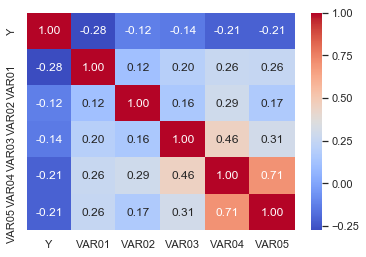

In [14]:
g = sns.heatmap(df[["Y","VAR01","VAR02","VAR03","VAR04","VAR05"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [15]:
df["VAR17"] = df["VAR17"].str.replace(',','.')
df["VAR24"] = df["VAR24"].str.replace(',','.')
df["VAR25"] = df["VAR25"].str.replace(',','.')
df["VAR30"] = df["VAR30"].str.replace(',','.')

In [16]:
df["VAR17"] = df["VAR17"].astype(float)
df["VAR24"] = df["VAR24"].astype(float)
df["VAR25"] = df["VAR25"].astype(float)
df["VAR30"] = df["VAR30"].astype(float)

In [17]:
msk = np.random.rand(len(df)) < 0.8

In [18]:
train = df[msk]
test = df[~msk]
y_test = test['Y']
del test['Y']
x_test = test

In [19]:
IDtest = test["ID do Aluno"].reset_index()
test = test.drop(labels = ["ID do Aluno"],axis = 1)

In [20]:
Y_train = train["Y"]
X_train = train.drop(labels = ["Y"],axis = 1)

In [21]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

clf = clf.fit(X_train,Y_train)

In [27]:
cross_val_score(clf, x_test, y_test, cv=20)

array([0.87254902, 0.86928105, 0.89869281, 0.8627451 , 0.87254902,
       0.87254902, 0.85294118, 0.88888889, 0.86601307, 0.83660131,
       0.84590164, 0.86885246, 0.87213115, 0.84539474, 0.87171053,
       0.85855263, 0.85526316, 0.8125    , 0.90131579, 0.88157895])

In [28]:
dot_data = export_graphviz(clf, out_file=None) 

In [29]:
graph = graphviz.Source(dot_data) 

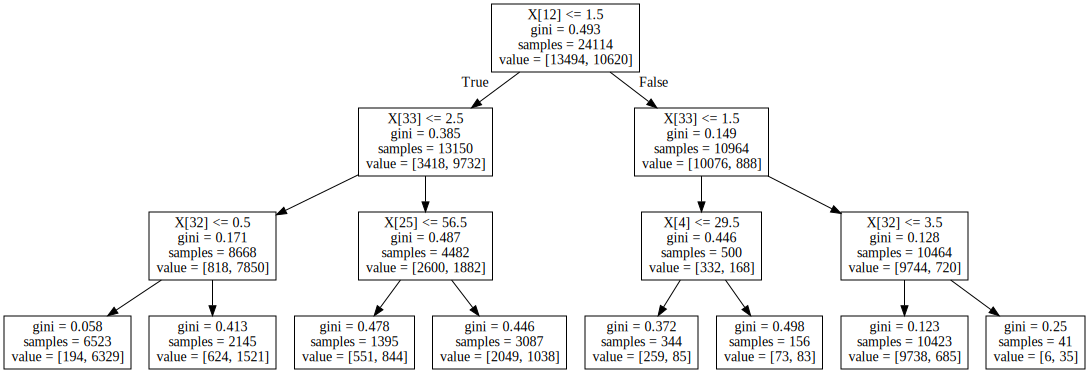

In [30]:
graph